# **Credit Card Fraud Detection using Machine Learning**

Objective:

The objective of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions. The model should be able to identify patterns and anomalies in transaction data that are indicative of fraud, and classify transactions as either legitimate or fraudulent.

I developed a credit card fraud detection system using a machine learning approach. I trained a RandomForestClassifier model on a dataset of credit card transactions and achieved an accuracy of 99% on the test set. My model effectively detects fraudulent transactions with 99% precision and 1.0 recall.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading and Exploring the Dataset


In [49]:
dataset = pd.read_csv('creditcard.csv')

In [5]:
dataset.shape

(284807, 31)

In [6]:
dataset.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
pd.value_counts(dataset['Class'])

<ipython-input-8-730eccfa18e4>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(dataset['Class'])


,count
Class,
0,284315
1,492


In [44]:
len(dataset[dataset['Class']==0])

284315

In [45]:
len(dataset[dataset['Class']==1])

492

Text(0, 0.5, 'Count')

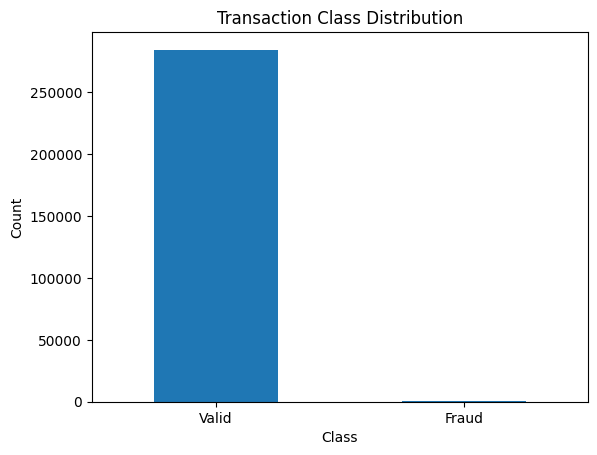

In [19]:
Fraud = dataset[dataset['Class']==1]
Valid = dataset[dataset['Class']==0]
c = pd.Series(dataset['Class']).value_counts(sort=True)
c.plot(kind="bar",rot=0)
plt.title("Transaction Class Distribution")
l=["Valid", "Fraud"]
plt.xticks(range(2),l)
plt.xlabel("Class")
plt.ylabel("Count")

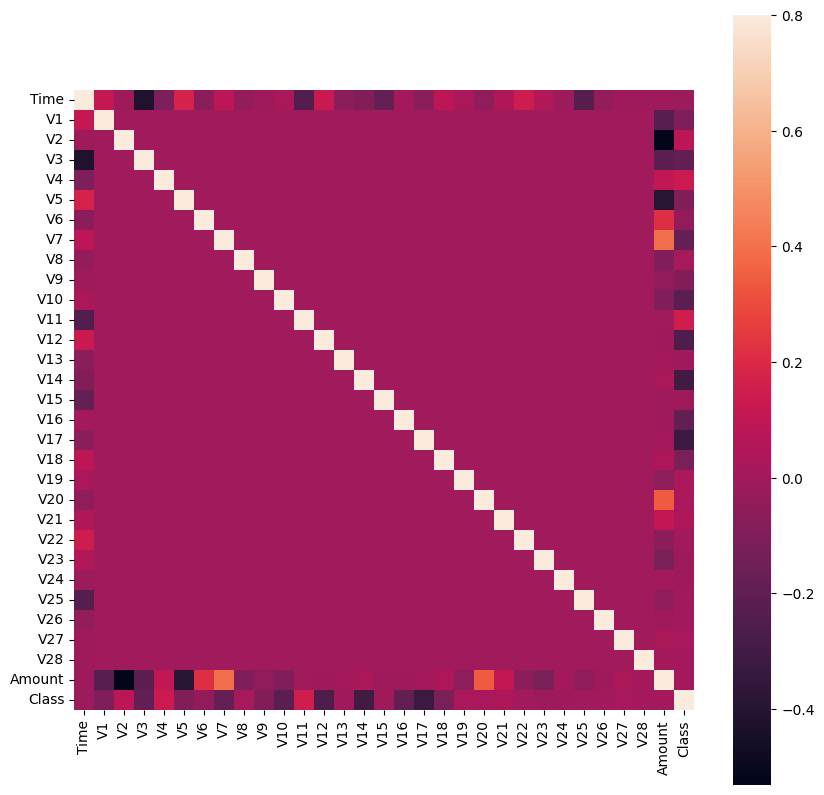

In [14]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()


#Data Preprocessing


In [20]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(X, y)

In [24]:
X.shape

(284807, 30)

In [25]:
x_res.shape

(568630, 30)

In [26]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})



# Splitting the Data into Training and Testing Sets


In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

# Scaling the Data


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_train.shape

(398041, 30)

In [29]:
y_train.shape

(398041,)

#Training the Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=42)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=42)

# Making Predictions and Evaluating the Model


In [31]:
y_pred = classifier.predict(x_test)

In [32]:
n_errors = (y_pred != y_test).sum()
print(n_errors)

7


In [33]:
y_test.shape

(170589,)

0.9999589657011883


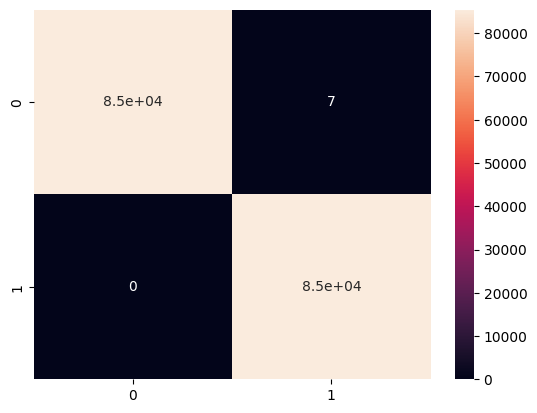

In [34]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [41]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[85142     7]
 [    0 85440]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Precision: 0.9999180778728335
Recall: 1.0
F1-score: 0.9999590372585392
